# 1. Introduction: Synthetic Sonic Curves Generation

## 1.1. Background

Well logs are interpreted/processed to estimate the in-situ petrophysical and geomechanical properties, which is essential for subsurface characterization. Various types of logs exist, and each provides distinct information about subsurface properties. Certain well logs, like gamma ray (GR), resistivity, density, and neutron logs, are considered as “easy-to-acquire” conventional well logs that are run in most of the wells. Other well logs, like nuclear magnetic resonance, dielectric dispersion, elemental spectroscopy, and sometimes sonic logs, are only run in limited number of wells.

Sonic travel-time logs contain critical geomechanical information for subsurface characterization around the wellbore. Often, sonic logs are required to complete the well-seismic tie workflow or geomechanical properties prediction. When sonic logs are absent in a well or an interval, a common practice is to synthesize them based on its neighboring wells that have sonic logs. This is referred to as sonic log synthesis or pseudo sonic log generation.

## 1.2. Problem Statement

Compressional travel-time (DTC) logs are not acquired in all the wells drilled in a field due to financial or operational constraints. Under such circumstances, machine learning techniques can be used to predict DTC logs to improve subsurface characterization. The goal of the study is to develop data-driven models by processing “easy-to-acquire” conventional logs from a list of weels, and use the data-driven models to generate synthetic compressional logs (DTC) in rest of Wells. A robust data-driven model for the desired sonic-log synthesis will result in low prediction errors, which can be quantified in terms of Root Mean Squared Error by comparing the synthesized and the original DTC logs.

You are provided with two datasets: train.csv and test.csv. You need to build a generalizable data-driven models using train dataset. Following that, you will deploy the newly developed data-driven models on test dataset to predict DTS logs. The data-driven model should use feature sets derived from the following 7 logs: 'NPHI', 'RHOB', 'ILD', 'CALI', 'CILD', 'GR', 'SP'. The data-driven model should synthesize the target logs: DTC.

## 1.3. Data Decription

In [151]:
las = lasio.read("7-LP-31-ES.las")

for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, Units: {curve.unit}, Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT, Units: M, Description: Measured Depth
Curve: CALI, Units: in, Description: CALIPER
Curve: CILD, Units: mS/m, Description: CALIBRATED DEEP INDUCTION CONDUCTIVITY
Curve: DRHO, Units: g/cm3, Description: BULK DENSITIY CORRECTION
Curve: GR, Units: gAPI, Description: GAMMA RAY
Curve: ILD, Units: ohm.m, Description: INDUCTION DEEP RESISTIVITY
Curve: NPHI, Units: %, Description: THERMAL NEUTRON POROSITY (ORIGINAL RATIO METHOD) IN SELECTED LITHOLOGY
Curve: PEF, Units: Adim, Description: PHOTOELETRIC FACTOR
Curve: RHOB, Units: g/cm3, Description: BULK DENSITY
Curve: RSP, Units: mV, Description: RAW SP
Curve: SFLU, Units: ohm.m, Description: SFL RESISTIVITY UNAVERAGED
Curve: SP, Units: mV, Description: SPONTANEOUS POTENTIAL
Curve: VSH, Units: v/v, Description: VOLUME DE FOLHELHO
There are a total of: 13 curves present within this file


In [597]:
['NPHI', 'RHOB', 'ILD', 'CALI', 'CILD', 'GR', 'SP']

['NPHI', 'RHOB', 'ILD', 'CALI', 'CILD', 'GR', 'SP']

## 1.4. Evaluation Metric

We will be evaluated by the metirc Root Mean Squared Error.

The RMSE is calculated as:

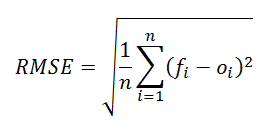

In [1]:
from IPython.display import Image
Image(filename='RMSE.png')

Where:

- "Fi" is the predicted curve for DTC
- "Oi" is the true value for evaluation.

DTC are in the same weight during the evaluation

Understanding and optimizing your predictions for this evaluation metric is paramount for this chalange.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import lasio
import os
import re

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

# import sklearn libararies
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPRegressor

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [4]:
%cd "C:\Users\gsenra\Desktop\Gabriel\Gold"
listaDeLAS = pd.DataFrame(os.listdir())[0].tolist()

C:\Users\gsenra\Desktop\Gabriel\Gold


In [88]:
foo = lasio.read("4-LP-86-ES.las")
foo2 = (foo.df()).reset_index()
foo2.columns

Index(['DEPT', 'CALI', 'DRHO', 'DT', 'GR:1', 'GR:2', 'ILD', 'NPHI', 'NPOR',
       'PEF', 'RHOB', 'SFLU', 'SP', 'TENS:1', 'TENS:2', 'TOT', 'TTI', 'VSH',
       'LITO'],
      dtype='object')

In [139]:
def getDirtyData(well):

    for i in range (len(well.columns)):
        #Contem minemônicos repetidos - Merece tratamento
        if (":1" in well.columns[i]):
            foo = True
    return foo

In [122]:
def segregateData(well):
    for i in range (len(well.columns)):
        #Contem DT e minemônicos únicos
        if (well.columns[i] == "DT"):
            print("Las name:", las.well.WELL.value)
            training_list.append(listaDeLAS[j])
            
        #Não contem DT
        else:
            toPredict.append(las.well.WELL.value)

In [143]:
toAnalyse = []
toClean = []

toPredict = []
training_list = []

#Separa os bancos de dados em oque deve ser trato e oque já esta tratado
for j in range (len(listaDeLAS)):
    las = lasio.read(listaDeLAS[j])
    well = (las.df()).reset_index()
    getDirtyData(well, foo)
    if foo == True:
        toClean.append(listaDeLAS[j])
        
# #Separo os bancos de dados que contem classe e não contem classe.
# for s in range (len(toAnalyse)):
#     las = lasio.read(toAnalyse[s])
#     well = (las.df()).reset_index()
#     segregateData(well)


# print("\nIn clonclusion we have:", len(listaDeLAS), "Las files in Lagoa Parda.","\n\nAmong them there are", len(training_list),
#       "files that have the minemonic of interest available for training. In addition we have", len(toClean), "that deserve special treatment of the data.")

In [145]:
toAnalyse = []
toClean = []

toPredict = []
training_list = []

foo = False

for j in range (len(listaDeLAS)):
    las = lasio.read(listaDeLAS[j])
    well = (las.df()).reset_index()
    for i in range (len(well.columns)):
        #Contem minemônicos repetidos - Merece tratamento
        if (":1" in well.columns[i]):
            foo = True
    if foo == True:
        toClean.append(listaDeLAS[j])

In [148]:
len(listaDeLAS)

90

In [149]:
toClean

['1-LP-54-ES.las',
 '3-LP-22-ES.las',
 '3-LP-3-ES.las',
 '3-LP-4-ES.las',
 '3-LP-5-ES.las',
 '3-LP-60-ES.las',
 '3-LP-61-ES.las',
 '3-LP-62-ES  .las',
 '3-LP-69-ES.las',
 '3-LP-71-ES.las',
 '4-LP-17-ES .las',
 '4-LP-29-ES .las',
 '4-LP-55-ES.las',
 '4-LP-86-ES.las',
 '4-LP-87-E.las',
 '6-LP-90-ES.las',
 '7-LP-10-ES.las',
 '7-LP-11-ES.las',
 '7-LP-12-ES.las',
 '7-LP-13-ES.las',
 '7-LP-14-ES.las',
 '7-LP-15-ES.las',
 '7-LP-16-ES.las',
 '7-LP-18-ES.las',
 '7-LP-19-ES.las',
 '7-LP-20-ES.las',
 '7-LP-21-ES.las',
 '7-LP-23-ES.las',
 '7-LP-24-ES.las',
 '7-LP-25-ES.las',
 '7-LP-26-ES.las',
 '7-LP-27-ES.las',
 '7-LP-28-ES.las',
 '7-LP-30-ES.las',
 '7-LP-31-ES.las',
 '7-LP-32-ES.las',
 '7-LP-33-ES.las',
 '7-LP-34-ES.las',
 '7-LP-35-ES.las',
 '7-LP-36-ES.las',
 '7-LP-37-ES .las',
 '7-LP-38-ES.las',
 '7-LP-39-ES.las',
 '7-LP-40-ES.las',
 '7-LP-41-ES.las',
 '7-LP-42-ES.las',
 '7-LP-43-ES.las',
 '7-LP-44-ES.las',
 '7-LP-45-ES.las',
 '7-LP-46-ES.las',
 '7-LP-47-ES.las',
 '7-LP-48-ES.las',
 '7-LP-49-E

In [81]:
len(toClean)+len(toPredict)+len(training_list)

857

In [72]:
training_list[0]

,DEPT,CALI,CILD,DT,GR,ILD,SP,TOT,TTI,LITO
0,300.0,NaN,NaN,NaN,54.460,NaN,NaN,NaN,NaN,56.0
1,300.2,NaN,NaN,NaN,62.285,NaN,NaN,NaN,NaN,56.0
2,300.4,NaN,NaN,NaN,66.667,NaN,NaN,NaN,NaN,56.0
3,300.6,NaN,NaN,NaN,71.674,NaN,NaN,NaN,NaN,56.0
4,300.8,NaN,NaN,NaN,73.239,NaN,NaN,NaN,NaN,56.0
...,...,...,...,...,...,...,...,...,...,...
9146,2129.2,9.2243,96.3009,68.4587,164.632,11.1562,-46.1732,373.5844,0.0,70.0
9147,2129.4,9.1936,97.4766,NaN,163.067,11.2500,-47.8477,NaN,NaN,70.0
9148,2129.6,9.1737,99.0099,NaN,158.998,11.2243,-49.9002,NaN,NaN,70.0
9149,2129.8,NaN,NaN,NaN,100.156,11.0972,-50.1429,NaN,NaN,70.0


# 1.3. Data Decription

In [730]:
trainingWell = training_list[3]
trainingWell = trainingWell[['NPHI', 'RHOB', 'ILD', 'CALI', 'CILD', 'GR', 'SP','DT','DEPT']]
trainingWell = trainingWell.dropna()

print(trainingWell.columns.to_list())
print("\n\n",las.well)

['NPHI', 'RHOB', 'ILD', 'CALI', 'CILD', 'GR', 'SP', 'DT', 'DEPT']


 Mnemonic  Unit  Value                    Description                   
--------  ----  -----                    -----------                   
STRT      M     185.0                    Start Depth                   
STOP      M     1630.0                   Stop  Depth                   
STEP      M     0.2                      Step                          
NULL            -99999.0                 Null Value                    
COMP            PETROLEO BRASILEIRO S/A  Company                       
ORIG            SIGEO EXPORTACAO PERFIL  Origem dos dados              
WELL            7-LP-9-ES                Well                          
FLD             LAGOA PARDA              Field                         
STAT            ESPIRITO SANTO           State                         
API             342700044900             API Code                      
X               412780.9                 Surface X                 

## 5. Exploratory Data Analysis

In [731]:
trainingWell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2542 entries, 2428 to 4969
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NPHI    2542 non-null   float64
 1   RHOB    2542 non-null   float64
 2   ILD     2542 non-null   float64
 3   CALI    2542 non-null   float64
 4   CILD    2542 non-null   float64
 5   GR      2542 non-null   float64
 6   SP      2542 non-null   float64
 7   DT      2542 non-null   float64
 8   DEPT    2542 non-null   float64
dtypes: float64(9)
memory usage: 198.6 KB


In [732]:
trainingWell.describe()

,NPHI,RHOB,ILD,CALI,CILD,GR,SP,DT,DEPT
count,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000
mean,37.739302,2.317325,1.211813,9.508195,1055.090262,114.898832,1.512299,112.114317,1493.748209
std,7.631875,0.089347,3.183439,0.834775,227.589980,18.892009,13.241213,13.354471,111.854959
min,3.320300,1.818400,0.340300,7.757800,13.367200,56.429700,-51.218800,52.093800,1300.124100
25%,36.742525,2.276200,0.864400,8.981300,984.500000,106.578100,0.189575,111.812500,1396.936100
50%,39.778150,2.316400,0.926550,9.509300,1078.500000,116.343800,4.974650,116.750000,1493.748200
75%,42.008975,2.357400,1.014600,9.882800,1156.000000,125.843800,8.052750,119.062500,1590.560300
max,50.290000,2.670900,74.750000,14.273400,2934.000000,182.250000,20.109400,126.875000,1687.372400


In [734]:
#Scatterplot matrix
fig = px.scatter_matrix(trainingWell, dimensions=
['NPHI', 'RHOB', 'ILD', 'CALI', 'CILD', 'GR', 'SP','GR'],
labels={col:col.replace('_', ' ') for col in trainingWell.columns},           height=900, color="DEPT", color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

array([[<AxesSubplot:title={'center':'NPHI'}>,
        <AxesSubplot:title={'center':'RHOB'}>,
        <AxesSubplot:title={'center':'ILD'}>],
       [<AxesSubplot:title={'center':'CALI'}>,
        <AxesSubplot:title={'center':'CILD'}>,
        <AxesSubplot:title={'center':'GR'}>],
       [<AxesSubplot:title={'center':'SP'}>,
        <AxesSubplot:title={'center':'DT'}>, <AxesSubplot:>]],
      dtype=object)

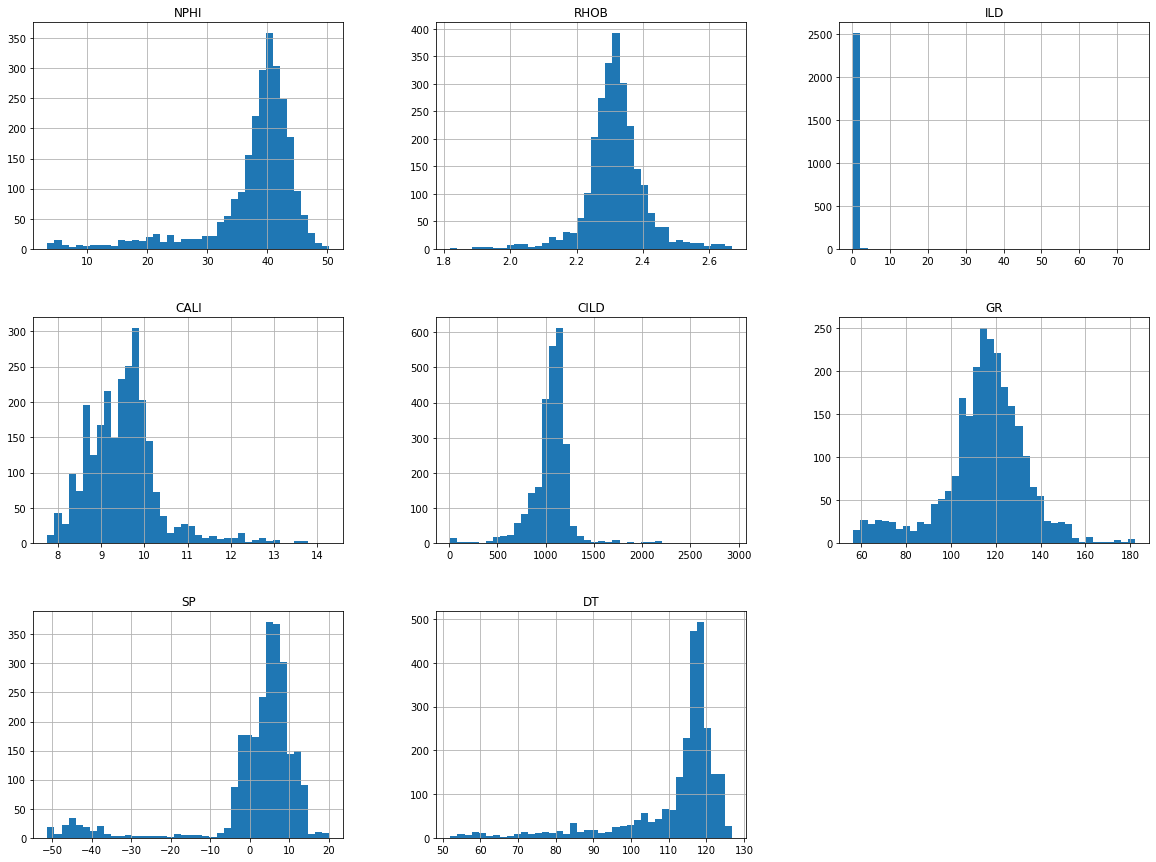

In [710]:
trainingWell.hist(bins=40, figsize=(20, 15))

##### 'DEPT', 'CALI', 'CILD', 'DT', 'GR', 'ILD', 'SP', 'TOT', 'TTI', 'LITO'

In [711]:
fig = px.box(trainingWell2, x="DT",
color_discrete_sequence=px.colors.qualitative.Dark24,
labels={col:col.replace('_', ' ') for col in trainingWell.columns},
category_orders={})
fig.update_layout(legend=dict(orientation="h", yanchor="bottom",
y=1.02, xanchor="right", x=1))
fig.show()

## Correlation Matrices

In [712]:
trainingWell.corr()

,NPHI,RHOB,ILD,CALI,CILD,GR,SP,DT
NPHI,1.000000,-0.604165,-0.344632,0.594216,0.273789,0.494817,0.664890,0.935761
RHOB,-0.604165,1.000000,0.294172,-0.680999,-0.421251,-0.029410,-0.213006,-0.598801
ILD,-0.344632,0.294172,1.000000,-0.119243,-0.385618,-0.199731,-0.221727,-0.331367
CALI,0.594216,-0.680999,-0.119243,1.000000,0.152558,0.130718,0.383008,0.564691
CILD,0.273789,-0.421251,-0.385618,0.152558,1.000000,-0.074107,-0.086515,0.324837
GR,0.494817,-0.029410,-0.199731,0.130718,-0.074107,1.000000,0.690419,0.441071
SP,0.664890,-0.213006,-0.221727,0.383008,-0.086515,0.690419,1.000000,0.664055
DT,0.935761,-0.598801,-0.331367,0.564691,0.324837,0.441071,0.664055,1.000000


<AxesSubplot:>

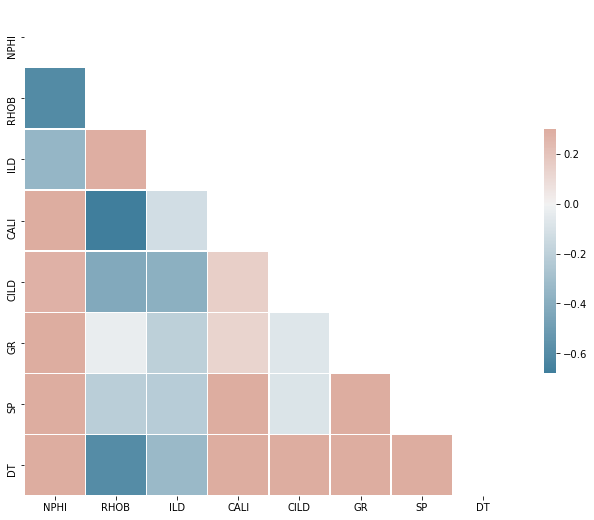

In [713]:
import seaborn as sns

corr = trainingWell.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Data Cleaning

In [ ]:
trainingWell = trainingWell.dropna()

## Feature Engineering 

?

<h1> Build Machine Learning Models

In [735]:
#Definindo Previsores e Classe
x_trainwell1 = trainingWell.loc[:, trainingWell.columns != 'DT'].values
y_trainwell1  = trainingWell.loc[:, trainingWell.columns == 'DT'].values

# standize the matrix for training data
scaler = StandardScaler()
x_trainwell1 = scaler.fit_transform(x_trainwell1)

In [736]:
# train test split
# please remember to use random_state for all randomization steps, this will ensure we get the same results 
# as yours during the validation phase. 
X_train, X_test, y_train, y_test = train_test_split(x_trainwell1, y_trainwell1, test_size=0.2, random_state=100)

X_train.shape, X_test.shape
y_train.shape, y_test.shape

((2033, 1), (509, 1))

In [737]:
def grid_search(clf, param_grid, X_train=X_train, y_train=y_train):
    """
    Fits a classifier to its training data and prints its ROC AUC score.
    
    INPUT:
    - clf (classifier): classifier to fit
    - param_grid (dict): classifier parameters used with GridSearchCV
    - X_train (DataFrame): training input
    - y_train (DataFrame): training output
            
    OUTPUT:
    - classifier: input classifier fitted to the training data
    """
    # cv uses StratifiedKFold
    # scoring r2 as parameter
    grid = GridSearchCV(estimator=clf, 
                        param_grid=param_grid, 
                        scoring='r2', 
                        cv=5)
    grid.fit(X_train, y_train.ravel())
    print(grid.best_score_)
    
    return grid.best_estimator_

In [738]:
def result_plot(y_predict, y_real=y_trainwell1):
    # check the accuracy of predicted data and plot the result
    print('Root Mean Square Error is:', '{:.5f}'.format(np.sqrt(mean_squared_error(y_real, y_predict))))
    plt.subplots(figsize=(42,12))
    plt.subplot(2, 2, 1)
    plt.plot(y_real[:])
    plt.plot(y_predict[:])
    plt.legend(['True', 'Predicted'])
    plt.xlabel('Sample')
    plt.ylabel('DTC')
    plt.title('DTC Prediction Comparison')
    
    plt.subplot(2, 2, 3)
    plt.scatter(y_real[:], y_predict[:])
    plt.xlabel('Real Value')
    plt.ylabel('Predicted Value')
    plt.title('DTC Prediction Comparison')
    
    plt.show()

### Linear Regression AI algorithm

0.9276386832032208
Root Mean Square Error is: 3.62057


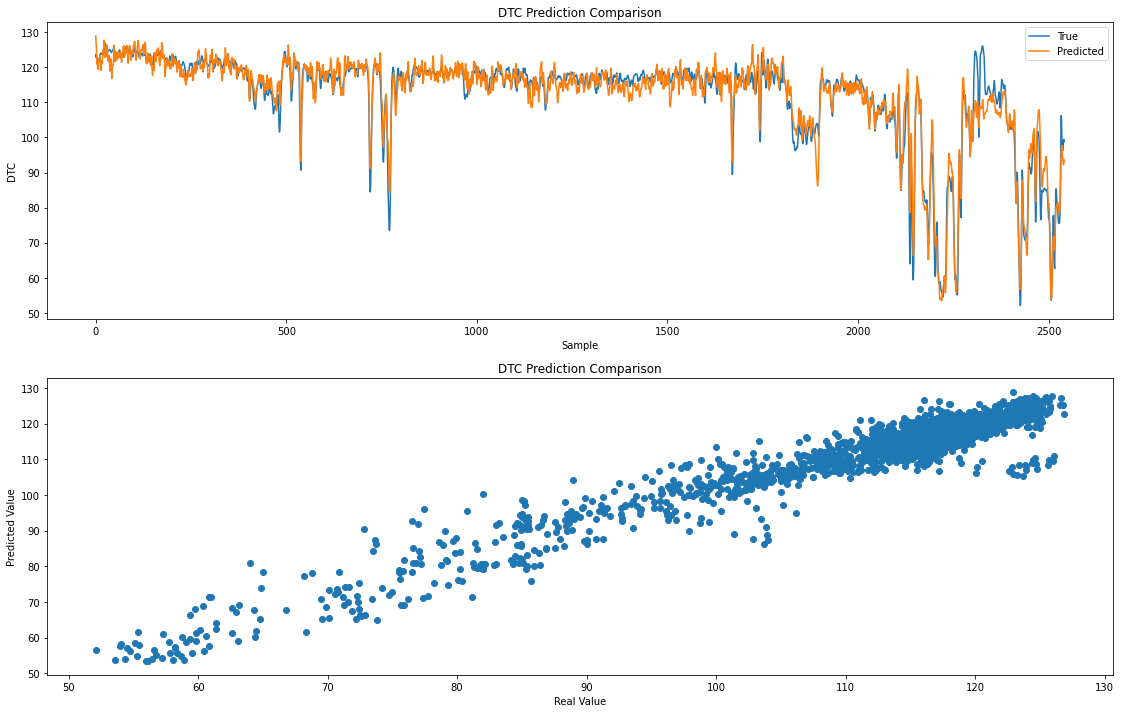

In [739]:
# Linear regression model as the baseline
LR = LinearRegression()
LR_best = grid_search(LR, {})
LR_predict = LR_best.predict(x_trainwell1)
result_plot(LR_predict, y_trainwell1)

Tikhonov regularization, named for Andrey Tikhonov, is a method of regularization of ill-posed problems. Also known as ridge regression, it is particularly useful to mitigate the problem of multicollinearity in linear regression, which commonly occurs in models with large numbers of parameters. In general, the method provides improved efficiency in parameter estimation problems in exchange for a tolerable amount of bias (see bias–variance tradeoff).

Accuracy Score is: 0.89677
Root Mean Square Error is: 4.34597


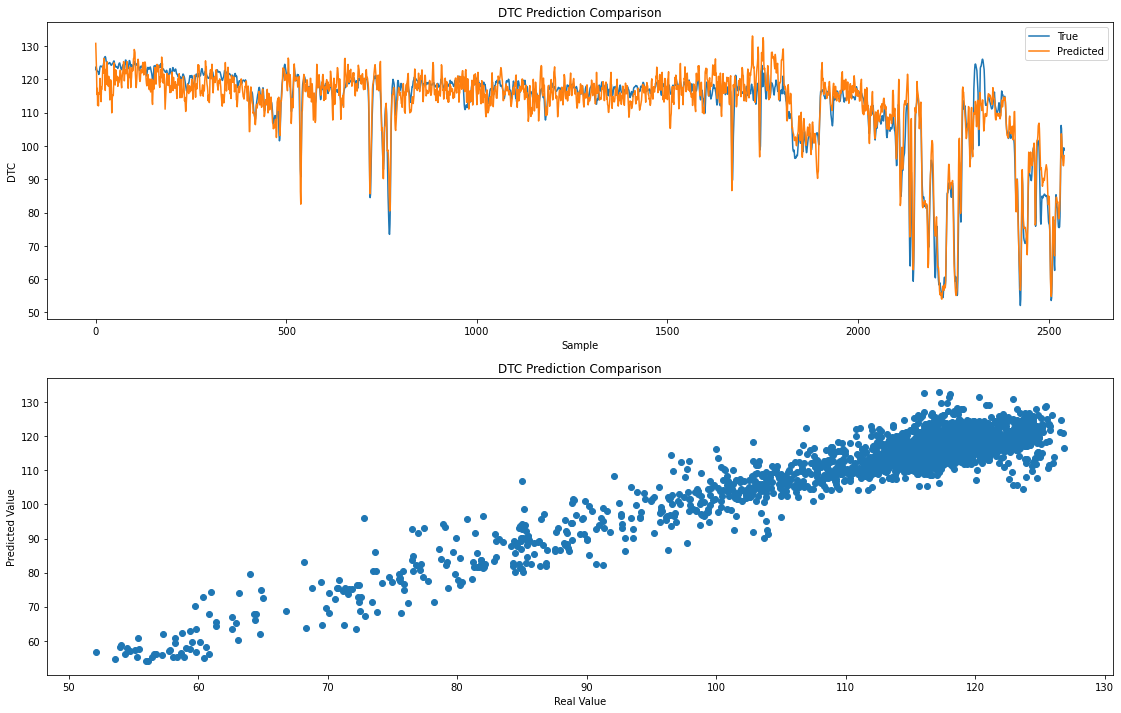

In [716]:
# Add ridge regularization, and see if there's any improvement
ridge = RidgeCV(cv=5, alphas=[1e-3, 1e-2, 1e-1, 1], )
ridge.fit(X_train, y_train)
print('Accuracy Score is:', '{:.5f}'.format(ridge.score(X_train, y_train)))
result_plot(ridge.predict(x_trainwell1), y_trainwell1)

Accuracy Score is: 0.92945
Root Mean Square Error is: 3.62065


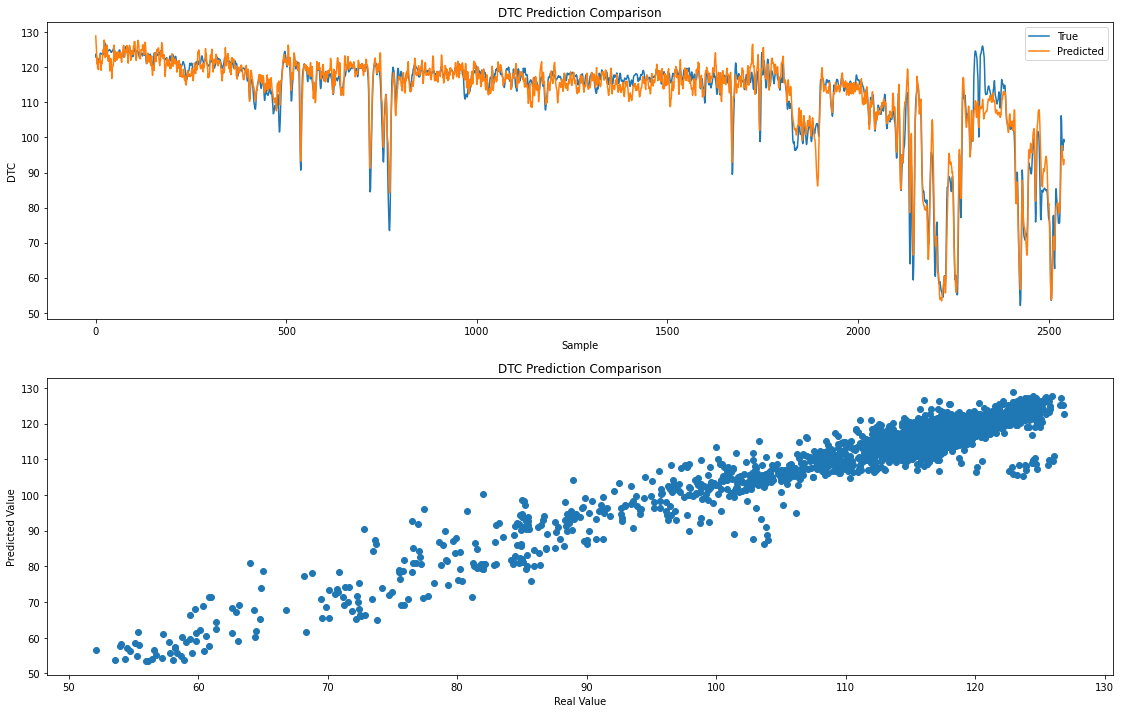

In [740]:
# Add ridge regularization, and see if there's any improvement
ridge = RidgeCV(cv=5, alphas=[1e-3, 1e-2, 1e-1, 1], )
ridge.fit(X_train, y_train)
print('Accuracy Score is:', '{:.5f}'.format(ridge.score(X_train, y_train)))
result_plot(ridge.predict(x_trainwell1), y_trainwell1)

### Random forest model

0.9690707121253095
Root Mean Square Error is: 1.19737


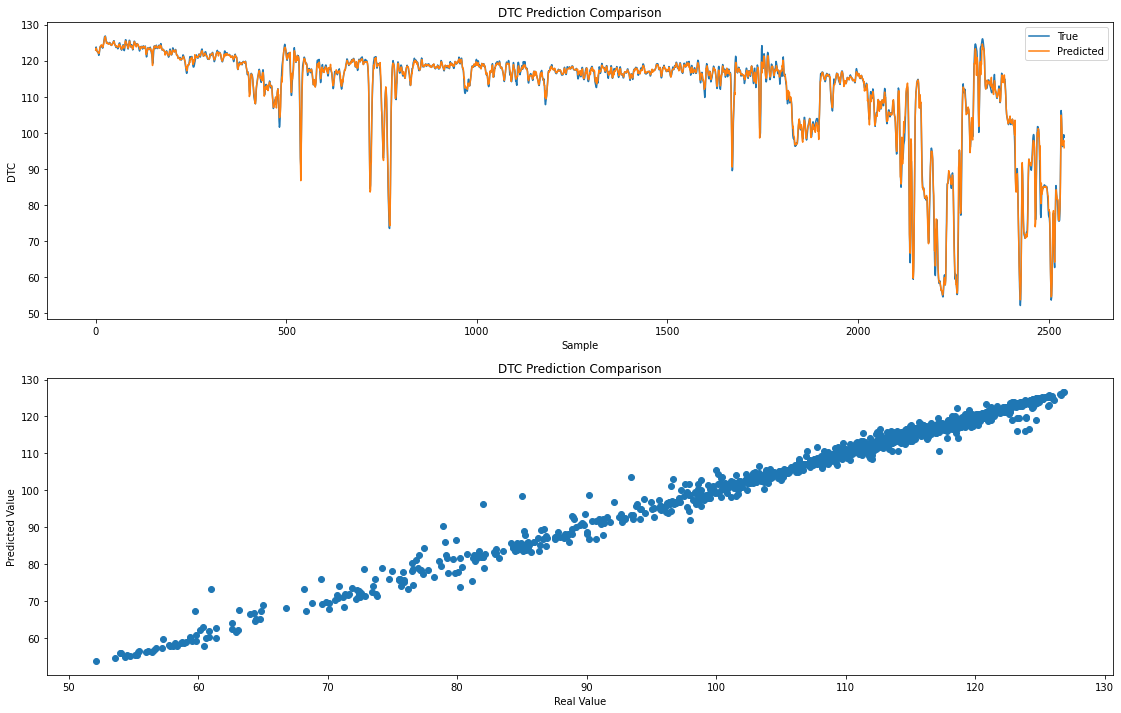

In [741]:
RF = RandomForestRegressor(n_estimators=100, random_state=100)
RF_best = grid_search(RF, {})
result_plot(RF_best.predict(x_trainwell1), y_trainwell1)

## Feature Importance

<AxesSubplot:>

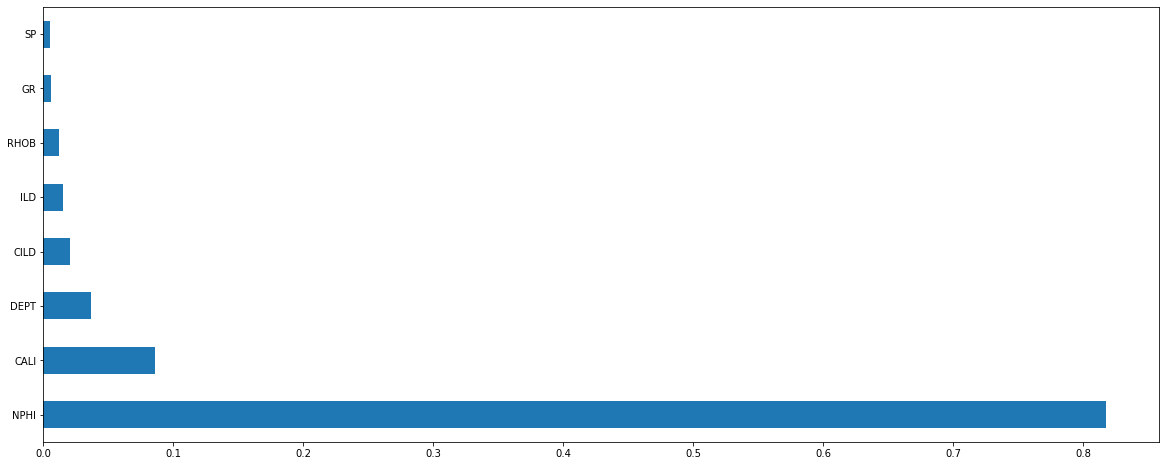

In [742]:
fig, (ax1) = plt.subplots(figsize = (20, 8))
feat_importances = pd.Series(RF_best.feature_importances_, index=trainingWell.loc[:, trainingWell.columns != 'DT'].columns)
feat_importances.nlargest(9).plot(kind='barh')

In [672]:
# from sklearn.calibration import calibration_curve
# from sklearn.metrics import brier_score_loss

# #Reliability plot and Brier Score
# fig = plt.figure(figsize=(14,10))
# plt.plot([0, 1], [0, 1], color="black")

# #KNN
# knn_y, knn_x = calibration_curve(classe_teste, preds_proba_knn[:,1], n_bins=10, normalize=True)
# loss_knn = brier_score_loss(classe_teste, preds_proba_knn[:,1])
# plt.plot(knn_x, knn_y, marker='o', label=f'KNN, Brier score = {str(round(loss_knn,3))}')

# #Logistic Regression
# lg_y, lg_x = calibration_curve(classe_teste, preds_proba_lg[:,1], n_bins=10, normalize=True)
# loss_lg = brier_score_loss(classe_teste, preds_proba_lg[:,1])
# plt.plot(lg_x, lg_y, marker='o',label=f'Logistic Regression, Brier score = {str(round(loss_lg,3))}')

Once we have the method we can validate its efficiency. For this we must apply the algorithm to a profile that has the same predictors and the "gauge" (DT).

## Applying Prodiction Method

In [748]:
trainingWell2 = training_list[15]
trainingWell2 = trainingWell2[['NPHI', 'RHOB', 'ILD', 'CALI', 'CILD', 'GR', 'SP','DT','DEPT']]

trainingWell2 = trainingWell2.dropna()
trainingWell2 = trainingWell2[(trainingWell2['DT'] < 150)]

#Definindo Previsores e Classe
x_trainwell2 = trainingWell2.loc[:, trainingWell2.columns != 'DT'].values
y_trainwell2  = trainingWell2.loc[:, trainingWell2.columns == 'DT'].values

x_trainwell2 = scaler.transform(x_trainwell2)

In [749]:
# run the prediction
well2_predict = RF_best.predict(x_trainwell2)

In [750]:
# import math

# #Faust's Equation for DT
# 1000/((2*trainingWell2['DEPTH']*trainingWell2['ILD'])

Root Mean Square Error is: 7.78071


Text(0.5, 1.0, 'DTC Prediction Comparison')

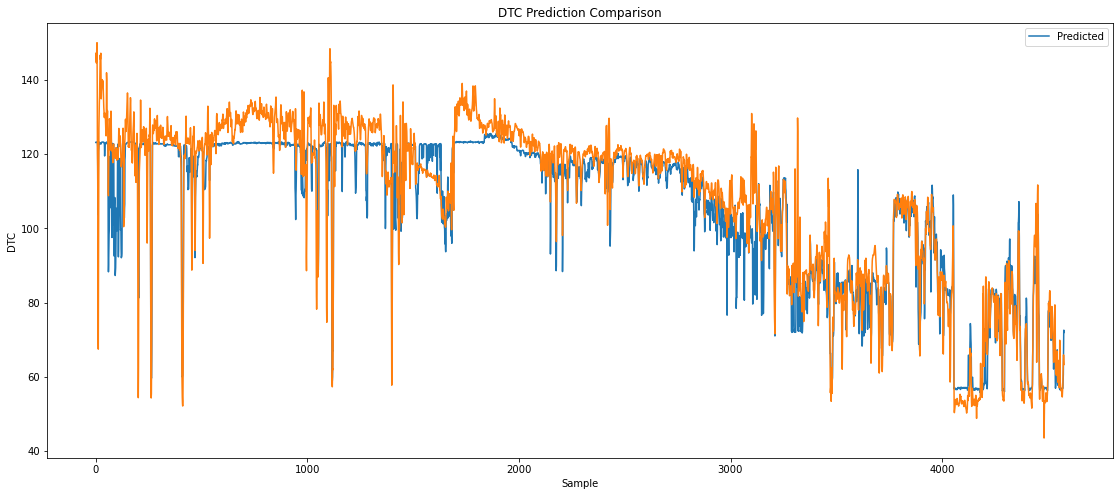

In [751]:
# plot the prediction results
print('Root Mean Square Error is:', '{:.5f}'.format(np.sqrt(mean_squared_error(trainingWell2['DT'].values, well2_predict[:]))))

plt.subplots(figsize=(42,8))
plt.subplot(1, 2, 1)
plt.plot(well2_predict[:])
plt.plot(trainingWell2['DT'].values)

plt.legend(['Predicted'])
plt.xlabel('Sample')
plt.ylabel('DTC')
plt.title('DTC Prediction Comparison')

## References:

https://github.com/pddasig/Machine-Learning-Competition-2020/blob/master/Synthetic%20Sonic%20Log%20Generation%20Starter_Yu%202_27_2020.ipynb

https://www.hindawi.com/journals/geofluids/2020/5387183/

ZHANG Dongxiao, CHEN Yuntian*, MENG Jin. Synthetic well logs generation via Recurrent Neural Networks 

https://petro.ai/blog/synthetic-well-log-reconstructing-bad-hole-well-log-results-with-machine-learning/

https://github.com/andymcdgeo/Petrophysics-Python-Series/blob/master/14%20-%20Displaying%20Lithology%20Data.ipynb
    
https://github.com/andymcdgeo/Petrophysics-Python-Series/blob/master/05%20-%20Petrophysical%20Calculations.ipynb
    
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
    
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

Pseudo Sonic Log Generation With Machine Learning: A Summary of SPWLA PDDA Machine Learning Contest 2020